# Measures Regression

**Problema**: temos um arquivo .csv com 10.000 registros de peso e altura de homens e mulheres. O objetivo é aplicar técnicas de Machine Learning para tentar predizer novos pesos e altura dado uma das medidas.

**Solução**: usar um regressor linear para criar um modelo capaz de predizer novas medidas. 
    - 50% das amostras para teste e 50% para validação;
    - Regressor baseado na correlação e desvio-padrão dos dados; e
    - Mensurar a qualidade do regressor pela medida de erro RMSE.

**Obs.**: eu utilizei as fórmulas estatísticas que tenho para calcular os termos da equação linear (ver OneNote) e deu o mesmo resultado.
    

## Sumário

1. [Imports](#Imports)
2. [Medida de Erro](#Medida-de-Erro)
3. [Importando os dados](#Importando-os-dados)
4. [Medida de Correlação](#Medida-de-Correlação)
5. [Desvio-Padrão](#Desvio-Padrão)
6. [Treinamento](#Treinamento)
7. [Validação](#Validação)
8. [Regressão baseada no Gênero](#Regressão-baseada-no-Gênero)
9. [Resultados](#Resultados)
10. [Regressão Linear do Scikit](#Regressão-Linear-do-Scikit)
11. [Referências](#Referências)

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Medida de Erro

Vamos utilizar a RMSE:

$$RMSE = \sqrt{\frac{\sum(P-X)^{2}}{n}}$$

Aonde *P* são os dados da predição e *X* são os dados de verificação, *n* é #amostras.

In [2]:
def RMSE(pred, x):
    n = pred.shape[0]
    return np.sqrt( np.sum( (pred - x)**2 ) / n)

## Importando os dados

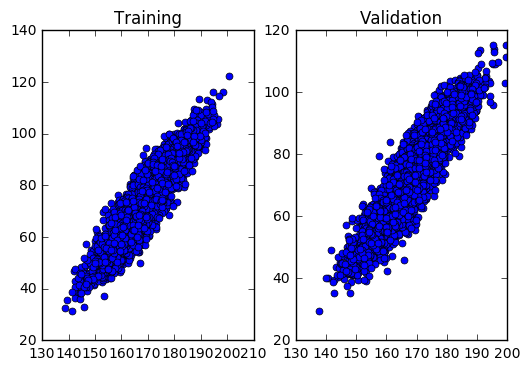

In [3]:
csv = np.genfromtxt('measures.csv', delimiter=',', dtype=float, skip_header=1)
train = csv[::2,3:5]
val = csv[1::2,3:5]

# Plot weigth X height for training and validation sets
%matplotlib inline

# Training set
plt.subplot(1,2,1)
plt.plot(train[:,0], train[:,1], linestyle='None', marker='o', markersize=5)
plt.title('Training')

# Validation set
plt.subplot(1,2,2)
plt.plot(val[:,0], val[:,1], linestyle='None', marker='o', markersize=5)
plt.title('Validation')

plt.show()

## Medida de Correlação

Vamos usar a Correlação Normalizada, que retorna um valor entre [-1,1] e segue a seguinte fórmula:

$$C(X,Y) = \frac{\sum(X-\overline{X})(Y-\overline{Y})}{\sqrt{\sum(X-\overline{X})^{2}\sum(Y-\overline{Y})^{2}}}$$

In [4]:
def correlation(x, y):    
    x1 = (x - np.mean(x))
    y1 = (y - np.mean(y))
    
    num = np.sum(x1 * y1)
    div = np.sqrt( np.sum(x1 ** 2) * np.sum(y1 ** 2) )
    
    return num/div

## Desvio-Padrão

Vamos utilizar a função padrão do desvio-padrão da biblioteca numpy: *np.std*.

## Treinamento

Desconsiderando o gênero, podemos escrever uma das medidas em função da outra como Y = f(x). Como podemos observar no gráfico, as medidas possuem uma relação linear entre elas. Assim, podemos definir Y usando uma equação linear da seguinte forma:

$$Y = B0 + B1*X$$

Utilizando a Correlação Linear e o Desvio-Padrão para estimar B0 e B1, temos:

$$B1 = C(X,Y)*\frac{STD(Y)}{STD(X)}$$

$$B0 = \overline{Y} - B1*\overline{X}$$

onde X = altura, Y = largura e $\overline{X}$ e $\overline{Y}$ representam a média.


In [5]:
b1 = correlation(train[:,0], train[:,1]) * np.std(train[:,1]) / np.std(train[:,0])
b0 = np.mean(train[:,1]) - (b1 * np.mean(train[:,0]))
print(b0, b1)

-158.101391421 1.37212609309


In [6]:
def compute_single_weight(height):
    return b0 + b1*height

print(compute_single_weight(173))

79.2764226839


## Validação

5.54506886778


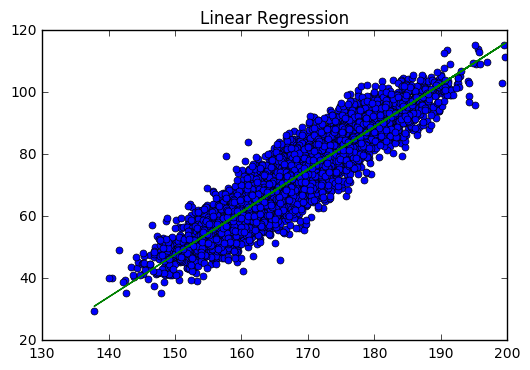

In [7]:
pred_weight = b0 + (b1 * val[:,0])
rmse = RMSE(pred_weight, val[:,1])

print(rmse)

# Plot the predicted weights over the validation set
plt.plot(val[:,0], val[:,1], linestyle='None', marker='o', markersize=5)
plt.plot(val[:,0], pred_weight)
plt.title('Linear Regression')

## Regressão baseada no Gênero

Sabemos que homens e mulheres são diferentes em termos da correlação entre peso/altura. É fácil perceber isso pelo gráfico:

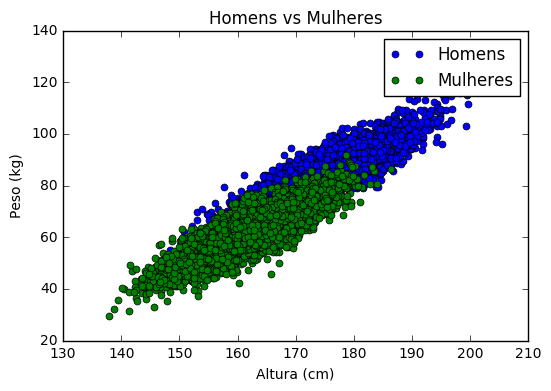

In [8]:
meas = pd.read_csv('measures.csv')
pd.options.display.max_rows = 10

male = meas[meas["Gender"] == 'Male'][["Height (cm)", "Weight (kg)"]][:]
female = meas[meas["Gender"] == 'Female'][["Height (cm)", "Weight (kg)"]][:]

# Convert to numpy arrays
male = male.values
female = female.values

plt.plot(male[:,0], male[:,1], linestyle='None', marker='o', markersize=5)
plt.plot(female[:,0], female[:,1], linestyle='None', marker='o', markersize=5)
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.legend(['Homens', 'Mulheres'])
plt.title('Homens vs Mulheres')

### Treinamento

In [9]:
male_train = male[::2,:]
male_val = male[1::2,:]
female_train = female[::2,:]
female_val = female[1::2,:]

male_b1 = correlation(male_train[:,0], male_train[:,1]) * np.std(male_train[:,1]) / np.std(male_train[:,0])
male_b0 = np.mean(male_train[:,1]) - (male_b1 * np.mean(male_train[:,0]))

female_b1 = correlation(female_train[:,0], female_train[:,1]) * np.std(female_train[:,1]) / np.std(female_train[:,0])
female_b0 = np.mean(female_train[:,1]) - (female_b1 * np.mean(female_train[:,0]))

print(male_b1, male_b0)
print(female_b1, female_b0)

1.06082728145 -101.24085764
1.06193301058 -110.199801352


### Validação

4.53885391579 4.55013773828


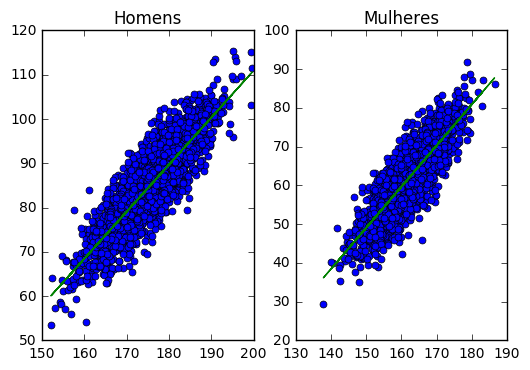

In [10]:
pred_weight_male = male_b0 + male_b1*male_val[:,0]
pred_weight_female = female_b0 + female_b1*female_val[:,0]
      
rmse_male = RMSE(pred_weight_male, male_val[:,1])
rmse_female = RMSE(pred_weight_female, female_val[:,1])

print(rmse_male, rmse_female)

# Plot model for men
plt.subplot(1,2,1)
plt.title('Homens')
plt.plot(male_val[:,0], male_val[:,1], linestyle='None', marker='o', markersize=5)
plt.plot(male_val[:,0], pred_weight_male)

# Plot model for women
plt.subplot(1,2,2)
plt.title('Mulheres')
plt.plot(female_val[:,0], female_val[:,1], linestyle='None', marker='o', markersize=5)
plt.plot(female_val[:,0], pred_weight_female)

In [11]:
"""Função Teste do Regressor"""
def compute_single_weight(height, male=True):
    if male:
        return male_b0 + male_b1*height
    else:
        return female_b0 + female_b1*height

print(compute_single_weight(189, True))
print(compute_single_weight(189, False))

99.2554985536
90.5055376467


## Resultados

In [12]:
res = [[rmse, rmse_male, rmse_female]]
df = pd.DataFrame(res, index=['RMSE'], columns = ['Humanos', 'Homens', 'Mulheres'])
df

,Humanos,Homens,Mulheres
RMSE,5.545069,4.538854,4.550138


## Regressão Linear do Scikit

In [13]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(male_train[:,0].reshape(-1,1), male_train[:,1].reshape(-1,1))

male_b0, male_b1 = regr.intercept_, regr.coef_

print(regr.intercept_, regr.coef_)
print(compute_single_weight(173, True))
print(regr.score(male_val[:,0].reshape(-1,1), male_val[:,1].reshape(-1,1)))

[-101.24085764] [[ 1.06082728]]
[[ 82.28226205]]
0.746890908158


In [14]:
male_train.shape

(2500, 2)

## Notas sobre Medidas de Erro 

Antes de finalizar, é importante destacar as diferenças entre algumas das principais medidas de erro usada para mensurar a regressão linear, apontando as vantagens e desvantagens de cada uma.

### Soma dos erros absolutos
**Vantagens:**
- Baixo custo computacional

**Desvantagens:**
- Pode existir mais de uma reta que geram a mesma soma de erro

### Soma dos erros quadrados
**Vantagens:**
- Garantia de somente uma reta ótima

**Desvantagens:**
- Maior custo computacional
- Cresce com a quantidade de dados. Exemplo: a mesma reta para dois conjuntos diferentes - um com mais pontos que o outro -, vai ocasionar num erro mais para o conjunto com mais pontos.

### $R^2$
**Vantagens:**
- Mede quanto a mudança da saída é explicada pela mudança na entrada
- Resultado normalizado entre 0 e 1

De forma resumida, use $R^2$ para medir o seu erro de regressão.

## Referências

1. https://helloacm.com/the-machine-learning-case-study-how-to-predict-weight-over-heightgender-using-linear-regression/